In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("student_performance_updated_1000.csv")

In [3]:
df.head(20)

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
7,8.0,Sophia,Female,NaN,17.0,77.0,1.0,Medium,78.0,1.0,70.0,True
8,9.0,James,Male,82.0,12.0,70.0,2.0,Low,72.0,3.6,50.0,False
9,10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.0,2.9,59.0,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [5]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab 
import scipy.stats as stats
import datetime
%matplotlib inline

In [6]:
df0 = df.copy()

### Check whether we could do CCA ( Complete Case Analysis)

In [7]:
 #missing percentages in each column
print( "df0.isnull().mean(): missing percentages in each column ")
df0.isnull().mean()

df0.isnull().mean(): missing percentages in each column 


StudentID                    0.040
Name                         0.034
Gender                       0.048
AttendanceRate               0.040
StudyHoursPerWeek            0.050
PreviousGrade                0.033
ExtracurricularActivities    0.043
ParentalSupport              0.022
FinalGrade                   0.040
Study Hours                  0.024
Attendance (%)               0.041
Online Classes Taken         0.025
dtype: float64

In [8]:
print('total students with values in all variables: ', df0.dropna().shape[0])
print('total students in the df: ', df0.shape[0])
print('percentage of data without missing values: ', round(df0.dropna().shape[0]/ float(df0.shape[0]),2))

total students with values in all variables:  645
total students in the df:  1000
percentage of data without missing values:  0.65


- Although each individual column has low missingness (≈ 2–5%), the missingness occurs in different columns for different rows, which causes only 65% of rows to be fully complete.
- 35% of the data has missing values across different variables. 
- Missingness is spead out, not concentrated in one column.
- Dropping all incomplete rows means you’ll lose 35% of your data.
- We need to text for MCAR, MAR and MNAR whether to perform CCA, as 35% of the data will be lost. 
- If Data is MCAR, we can perform CCA, otherwise we would end up with bias. 


In [9]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def little_mcar_test(df):
    """
    Perform Little's MCAR test manually.
    Returns: Chi-square statistic, degrees of freedom, and p-value
    """
    df = df.copy()
    df = df.select_dtypes(include=[np.number])  # only numeric columns
    df = df.dropna(axis=1, how='all')           # drop fully missing columns

    patterns = df.isnull().astype(int)
    pattern_groups = patterns.groupby(list(df.columns)).size().reset_index(name='count')
    
    mu = df.mean()
    cov = df.cov()
    inv_cov = np.linalg.pinv(cov.values)

    chi_square = 0
    total_count = len(df)
    
    for _, row in pattern_groups.iterrows():
        mask = 1 - row[df.columns].values
        group = df[df.isnull().astype(int).eq(row[df.columns].values).all(axis=1)]
        n_g = len(group)
        if n_g == 0:
            continue
        
        mu_g = group.mean()
        diff = (mu_g - mu).fillna(0).values
        chi_square += n_g * diff.T.dot(inv_cov * mask).dot(diff)
    
    dfree = len(pattern_groups) - 1
    p_value = 1 - chi2.cdf(chi_square, dfree)
    
    return chi_square, dfree, p_value


In [10]:
chi_square, dfree, p_value = little_mcar_test(df0)

print(f"Chi-square: {chi_square:.3f}")
print(f"Degrees of freedom: {dfree}")
print(f"P-value: {p_value:.5f}")


Chi-square: 211.687
Degrees of freedom: 34
P-value: 0.00000


if p > 0.05: Fail to reject MCAR → Missingness is completely random → ✅ CCA is safe

if p <= 0.05: Reject MCAR → Missingness not completely random → ⚠️ Use imputation instead

Because p ≈ 0.00000:
- Your dataset’s missingness is not MCAR.
- Missingness is systematic — it depends on other observed or unobserved variables.
- Therefore, performing Complete Case Analysis (CCA) would likely introduce bias.

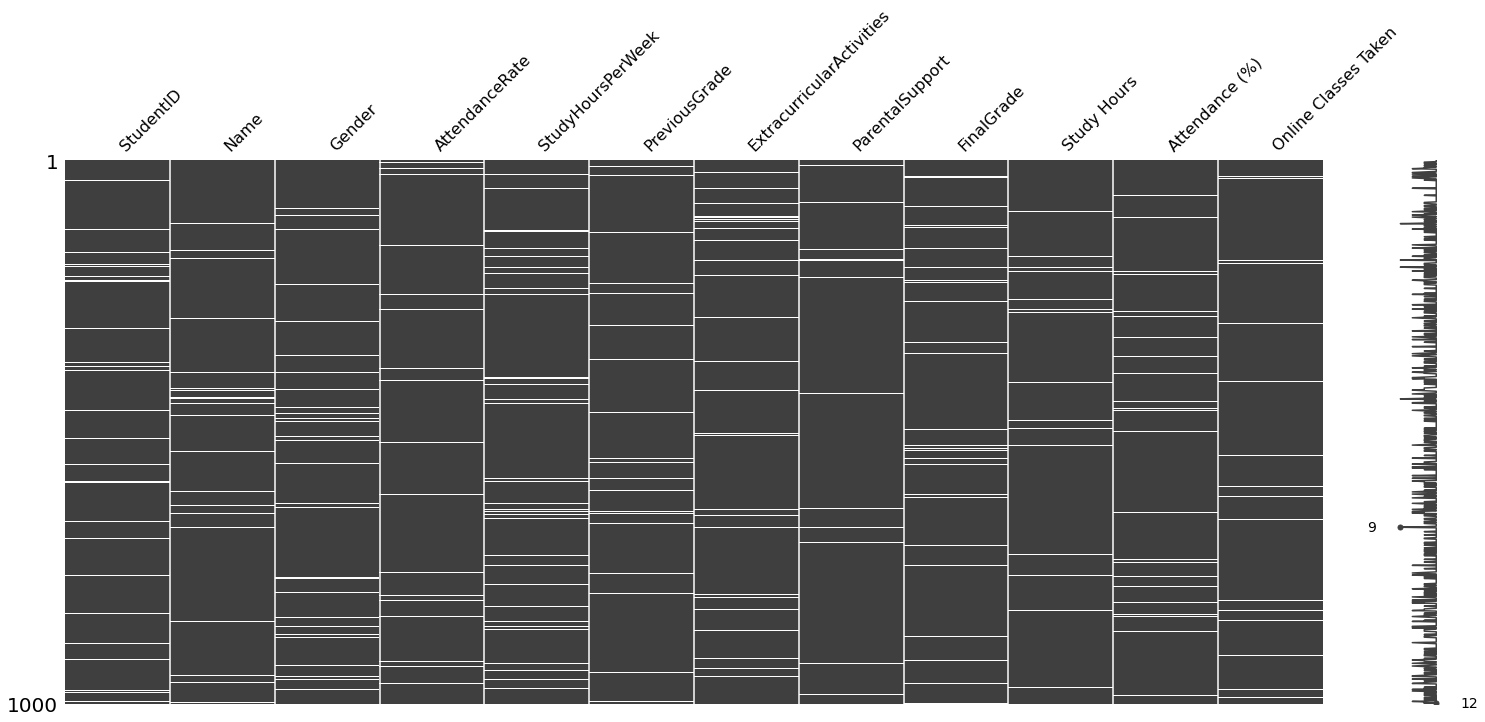

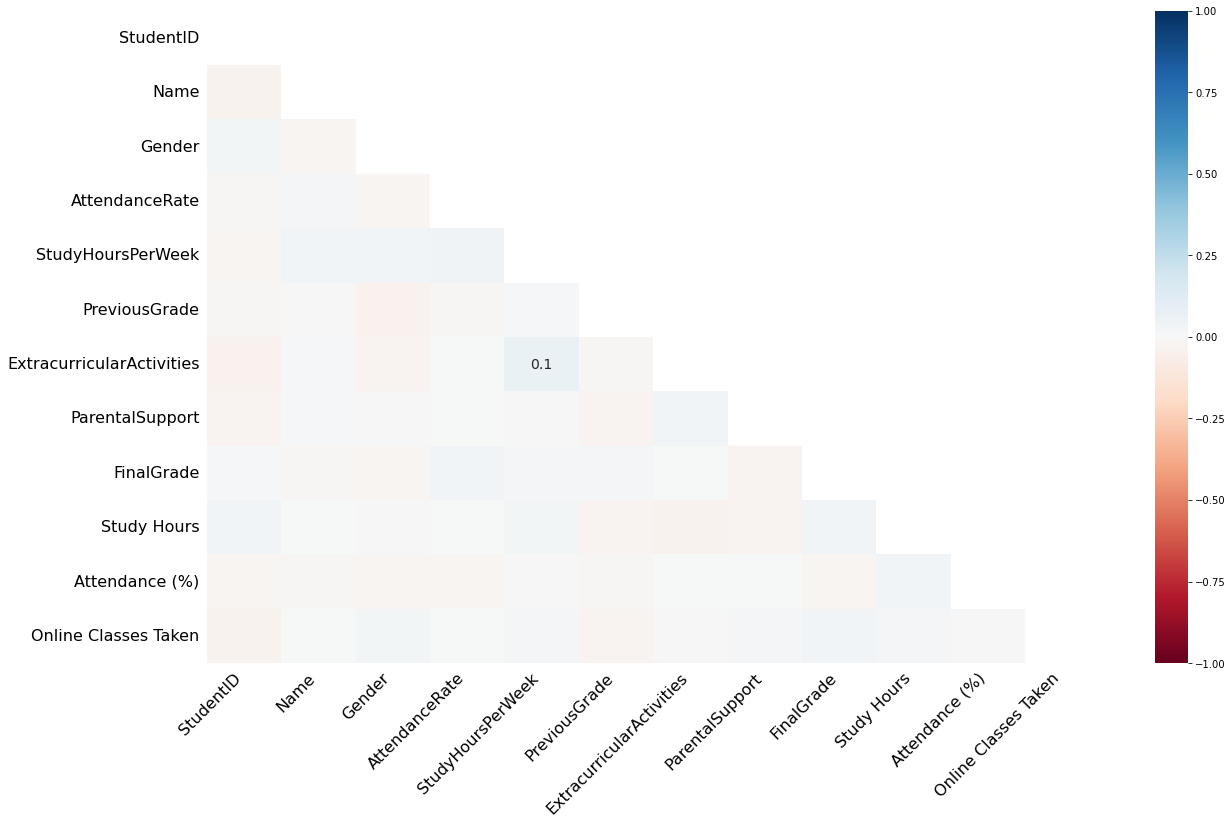

In [11]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data
msno.matrix(df0)
plt.show()

# Correlation of missingness between columns
msno.heatmap(df0)
plt.show()


Since your missingness is not random, you should avoid dropping incomplete rows (CCA).
- You have 35 % incomplete rows — deleting them will:
    - distort relationships between variables,
    - and reduce the representativeness of your student population.

In production, data scientists rarely use formal MCAR tests because:

- Too slow for large datasets
- Results are hard to explain to business stakeholders
- Business context matters more than statistical tests
- They assume MAR (Missing At Random) as default and handle it accordingly

### Mean / Median / Mode Imputation

In [12]:
df1 = df.copy()

In [13]:
df1.isnull().mean()

StudentID                    0.040
Name                         0.034
Gender                       0.048
AttendanceRate               0.040
StudyHoursPerWeek            0.050
PreviousGrade                0.033
ExtracurricularActivities    0.043
ParentalSupport              0.022
FinalGrade                   0.040
Study Hours                  0.024
Attendance (%)               0.041
Online Classes Taken         0.025
dtype: float64

Imputation should be done over the training set, and then propagated to the test set. This means that the mean/median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [14]:
print(df1.dtypes)
print("\n" + "="*50 + "\n")

for col in df1.columns:
    print(f"{col}:")
    print(f"  Type: {df1[col].dtype}")
    print(f"  Unique values: {df1[col].nunique()}")
    if df1[col].dtype == 'object':
        print(f"  Sample values: {df1[col].dropna().unique()[:5]}")
    print()

StudentID                    float64
Name                          object
Gender                        object
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport               object
FinalGrade                   float64
Study Hours                  float64
Attendance (%)               float64
Online Classes Taken          object
dtype: object


StudentID:
  Type: float64
  Unique values: 916

Name:
  Type: object
  Unique values: 962
  Sample values: ['John' 'Sarah' 'Alex' 'Michael' 'Emma']

Gender:
  Type: object
  Unique values: 2
  Sample values: ['Male' 'Female']

AttendanceRate:
  Type: float64
  Unique values: 9

StudyHoursPerWeek:
  Type: float64
  Unique values: 10

PreviousGrade:
  Type: float64
  Unique values: 10

ExtracurricularActivities:
  Type: float64
  Unique values: 4

ParentalSupport:
  Type: object
  Unique values: 3
  Sample values: ['High' 'Medium' 'Low

In [15]:
def analyze_column(df, col):
    """My mental checklist for every column"""
    
    print(f"\n{'='*50}")
    print(f"Analyzing: {col}")
    print(f"{'='*50}")
    
    # 1. Basic info
    print(f"Type: {df[col].dtype}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Missing: {df[col].isnull().sum()} ({df[col].isnull().mean()*100:.1f}%)")
    
    # 2. Value range
    if df[col].dtype in ['float64', 'int64']:
        print(f"Min: {df[col].min()}, Max: {df[col].max()}")
        print(f"Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
    
    # 3. Sample values
    print(f"Sample values: {df[col].dropna().unique()[:10]}")
    
    # 4. Red flags
    if df[col].dtype == 'float64' and df[col].nunique() < 20:
        print("⚠️ RED FLAG: Float with few unique values → Should be categorical?")
    
    if df[col].dtype == 'object' and df[col].nunique() == 2:
        print("⚠️ RED FLAG: Object with 2 values → Should be boolean?")
    
    # 5. Check for similar column names
    similar_cols = [c for c in df.columns if col.lower() in c.lower() and c != col]
    if similar_cols:
        print(f"⚠️ SIMILAR COLUMNS FOUND: {similar_cols} → Check for duplicates!")

# Run this for every column
for col in df1.columns:
    analyze_column(df1, col)


Analyzing: StudentID
Type: float64
Unique values: 916
Missing: 40 (4.0%)
Min: 1.0, Max: 9998.0
Mean: 5416.02, Median: 5396.50
Sample values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

Analyzing: Name
Type: object
Unique values: 962
Missing: 34 (3.4%)
Sample values: ['John' 'Sarah' 'Alex' 'Michael' 'Emma' 'Olivia' 'Daniel' 'Sophia' 'James'
 'Isabella']

Analyzing: Gender
Type: object
Unique values: 2
Missing: 48 (4.8%)
Sample values: ['Male' 'Female']
⚠️ RED FLAG: Object with 2 values → Should be boolean?

Analyzing: AttendanceRate
Type: float64
Unique values: 9
Missing: 40 (4.0%)
Min: 70.0, Max: 95.0
Mean: 85.51, Median: 88.00
Sample values: [85. 90. 78. 92. 95. 70. 82. 91. 88.]
⚠️ RED FLAG: Float with few unique values → Should be categorical?

Analyzing: StudyHoursPerWeek
Type: float64
Unique values: 10
Missing: 50 (5.0%)
Min: 8.0, Max: 30.0
Mean: 17.63, Median: 18.00
Sample values: [15. 20. 10. 25. 18. 30.  8. 17. 12. 22.]
⚠️ RED FLAG: Float with few unique values → Should be categ


##### Student Performance Dataset
##### Author: Data Science Pipeline


 PLOTTING HISTOGRAMS FOR ALL COLUMNS

✓ Loaded: 1000 rows × 12 columns

Plotting columns:
  ✓ StudentID (numerical)
  ✓ Name (categorical)
  ✓ Gender (categorical)
  ✓ AttendanceRate (numerical)
  ✓ StudyHoursPerWeek (numerical)
  ✓ PreviousGrade (numerical)
  ✓ ExtracurricularActivities (numerical)
  ✓ ParentalSupport (categorical)
  ✓ FinalGrade (numerical)
  ✓ Study Hours (numerical)
  ✓ Attendance (%) (numerical)
  ✓ Online Classes Taken (categorical)


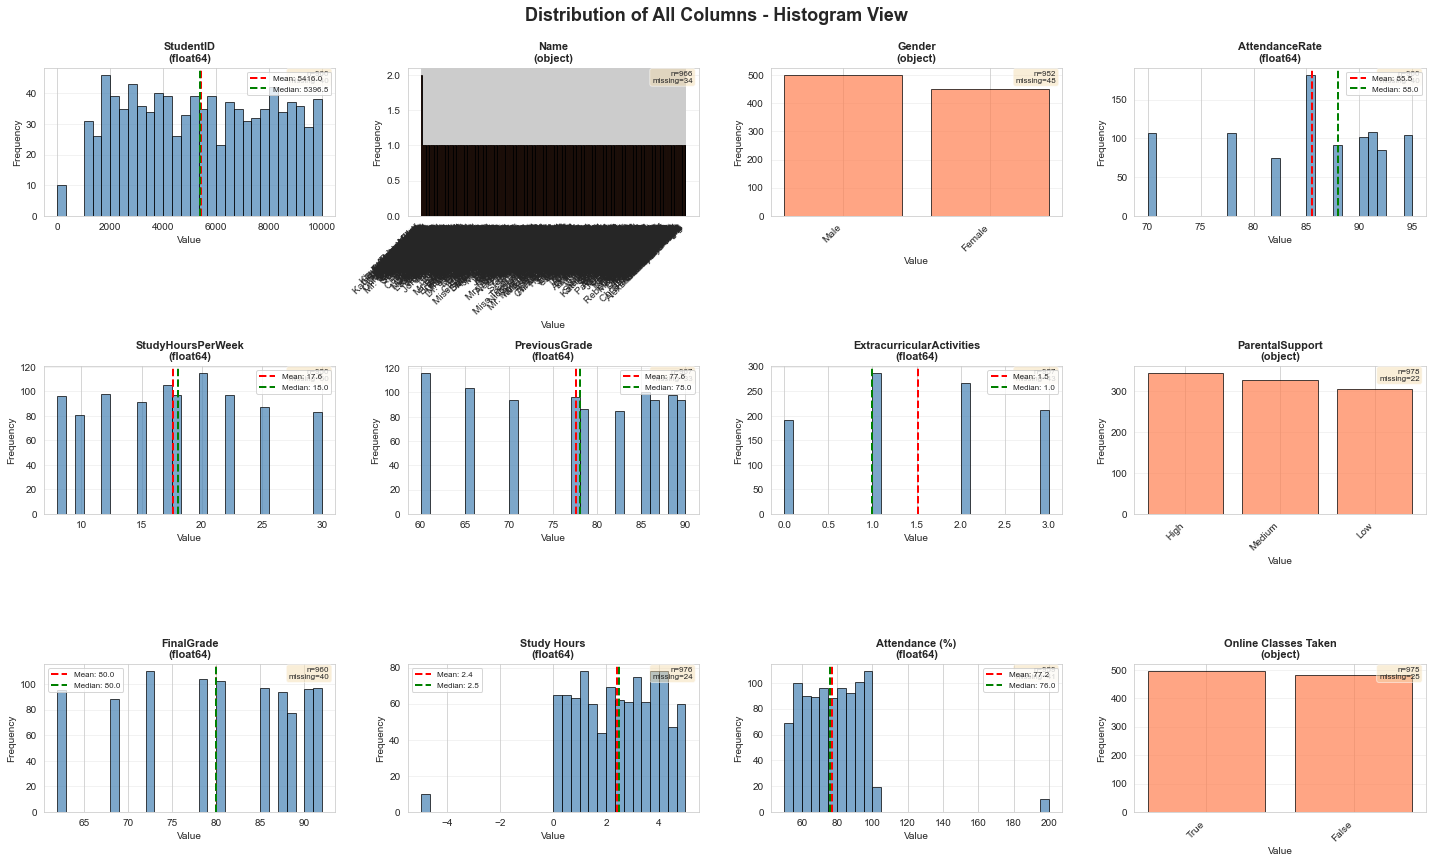

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

print("="*70)
print(" PLOTTING HISTOGRAMS FOR ALL COLUMNS")
print("="*70)

# Load data
print(f"\n✓ Loaded: {df1.shape[0]} rows × {df1.shape[1]} columns\n")

# Calculate grid size
n_cols = len(df1.columns)
n_rows = (n_cols + 3) // 4  # 4 columns per row

# Create figure
fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 4))
axes = axes.flatten()

print("Plotting columns:")

for idx, col in enumerate(df1.columns):
    ax = axes[idx]
    
    # Get data (remove missing values for plotting)
    data = df1[col].dropna()
    
    # Check if numerical or categorical
    if df1[col].dtype in ['float64', 'int64']:
        # NUMERICAL - Regular histogram
        ax.hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        
        # Add mean and median lines
        mean_val = data.mean()
        median_val = data.median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2,
                   label=f'Median: {median_val:.1f}')
        ax.legend(fontsize=8)
        
        print(f"  ✓ {col} (numerical)")
        
    else:
        # CATEGORICAL - Bar chart (frequency count)
        value_counts = data.value_counts()
        ax.bar(range(len(value_counts)), value_counts.values, 
               edgecolor='black', alpha=0.7, color='coral')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        print(f"  ✓ {col} (categorical)")
    
    # Common formatting
    ax.set_title(f'{col}\n({df1[col].dtype})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.3)
    
    # Add sample size
    n_missing = df1[col].isnull().sum()
    n_total = len(df)
    ax.text(0.98, 0.98, f'n={len(data)}\nmissing={n_missing}', 
            transform=ax.transAxes, fontsize=8,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide extra subplots
for idx in range(len(df1.columns), len(axes)):
    axes[idx].axis('off')

# Add title
plt.suptitle('Distribution of All Columns - Histogram View', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()


plt.show()
plt.close()



### Imputing Categorical using mode and median

In [17]:
categorical_imputation = {
    'Gender': 'mode',
    'ParentalSupport': 'mode',
    'Online Classes Taken': 'mode',
    'ExtracurricularActivities': 'median'  # Count variable
}

for col, method in categorical_imputation.items():
    if col in df1.columns:
        missing_before = df1[col].isnull().sum()
        if missing_before > 0:
            if method == 'mode':
                fill_value = df1[col].mode()[0]
                df1[col].fillna(fill_value, inplace=True)
                print(f"  ✓ {col}: {missing_before} values → mode ('{fill_value}')")
            elif method == 'median':
                fill_value = df1[col].median()
                df1[col].fillna(fill_value, inplace=True)
                print(f"  ✓ {col}: {missing_before} values → median ({fill_value})")

  ✓ Gender: 48 values → mode ('Male')
  ✓ ParentalSupport: 22 values → mode ('High')
  ✓ Online Classes Taken: 25 values → mode ('True')
  ✓ ExtracurricularActivities: 43 values → median (1.0)


/var/folders/r9/rbbf_ysj4pn8zk_zblls5fxm0000gn/T/ipykernel_20876/2233941441.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(fill_value, inplace=True)
/var/folders/r9/rbbf_ysj4pn8zk_zblls5fxm0000gn/T/ipykernel_20876/2233941441.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].fil

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     1000 non-null   object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  1000 non-null   float64
 7   ParentalSupport            1000 non-null   object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       1000 non-null   bool   
dtypes: bool(1), float64(8), object(3)
memory usage: 87.0+ KB


### imputing numerical columns using mean or knn

In [19]:
from sklearn.impute import KNNImputer

# Get numerical columns (exclude StudentID)
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'StudentID']

print(f"  Numerical columns: {numerical_cols}")

# Check which have missing values
missing_num_cols = [col for col in numerical_cols if df1[col].isnull().sum() > 0]

if len(missing_num_cols) > 0:
    print(f"  Columns with missing values: {missing_num_cols}")
    
    # Store original values for comparison
    original_means = {col: df1[col].mean() for col in missing_num_cols}
    
    # Apply KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
    df1[numerical_cols] = knn_imputer.fit_transform(df1[numerical_cols])
    
    print(f"\n  ✓ KNN Imputation completed (k=5, distance-weighted)")
    print(f"\n  Mean comparison before/after imputation:")
    for col in missing_num_cols:
        new_mean = df1[col].mean()
        diff = abs(original_means[col] - new_mean)
        print(f"    {col}: {original_means[col]:.2f} → {new_mean:.2f} (diff: {diff:.2f})")
else:
    print(f"  ✓ No missing values in numerical columns!")

  Numerical columns: ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'FinalGrade', 'Study Hours', 'Attendance (%)']
  Columns with missing values: ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade', 'Study Hours', 'Attendance (%)']

  ✓ KNN Imputation completed (k=5, distance-weighted)

  Mean comparison before/after imputation:
    AttendanceRate: 85.51 → 85.49 (diff: 0.02)
    StudyHoursPerWeek: 17.63 → 17.65 (diff: 0.02)
    PreviousGrade: 77.60 → 77.52 (diff: 0.08)
    FinalGrade: 80.03 → 80.07 (diff: 0.04)
    Study Hours: 2.41 → 2.41 (diff: 0.00)
    Attendance (%): 77.25 → 77.20 (diff: 0.04)


In [20]:
df1.head(10)

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.000000,15.0,78.0,1.0,High,80.000000,4.8,59.0,False
1,2.0,Sarah,Female,90.000000,20.0,85.0,2.0,Medium,87.000000,2.2,70.0,True
2,3.0,Alex,Male,78.000000,10.0,65.0,0.0,Low,68.000000,4.6,92.0,False
3,4.0,Michael,Male,92.000000,25.0,90.0,3.0,High,92.000000,2.9,96.0,False
4,5.0,Emma,Female,84.921616,18.0,82.0,2.0,Medium,85.000000,4.1,97.0,True
5,6.0,Olivia,Female,95.000000,30.0,88.0,1.0,High,79.284804,2.8,97.0,False
6,7.0,Daniel,Male,70.000000,8.0,60.0,0.0,Low,62.000000,4.5,96.0,False
7,8.0,Sophia,Female,88.547193,17.0,77.0,1.0,Medium,78.000000,1.0,70.0,True
8,9.0,James,Male,82.000000,12.0,70.0,2.0,Low,72.000000,3.6,50.0,False
9,10.0,Isabella,Female,91.000000,22.0,86.0,3.0,High,88.000000,2.9,59.0,True


In [21]:
# Running the above analyze column again to see the changes
# Run this for every column
for col in df1.columns:
    analyze_column(df1, col)


Analyzing: StudentID
Type: float64
Unique values: 916
Missing: 40 (4.0%)
Min: 1.0, Max: 9998.0
Mean: 5416.02, Median: 5396.50
Sample values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

Analyzing: Name
Type: object
Unique values: 962
Missing: 34 (3.4%)
Sample values: ['John' 'Sarah' 'Alex' 'Michael' 'Emma' 'Olivia' 'Daniel' 'Sophia' 'James'
 'Isabella']

Analyzing: Gender
Type: object
Unique values: 2
Missing: 0 (0.0%)
Sample values: ['Male' 'Female']
⚠️ RED FLAG: Object with 2 values → Should be boolean?

Analyzing: AttendanceRate
Type: float64
Unique values: 49
Missing: 0 (0.0%)
Min: 70.0, Max: 95.0
Mean: 85.49, Median: 87.32
Sample values: [85.         90.         78.         92.         84.92161569 95.
 70.         88.54719347 82.         91.        ]

Analyzing: StudyHoursPerWeek
Type: float64
Unique values: 60
Missing: 0 (0.0%)
Min: 8.0, Max: 30.0
Mean: 17.65, Median: 18.00
Sample values: [15. 20. 10. 25. 18. 30.  8. 17. 12. 22.]

Analyzing: PreviousGrade
Type: float64
Unique valu

 PLOTTING HISTOGRAMS FOR ALL COLUMNS

✓ Loaded: 1000 rows × 12 columns

Plotting columns:
  ✓ StudentID (numerical)
  ✓ Name (categorical)
  ✓ Gender (categorical)
  ✓ AttendanceRate (numerical)
  ✓ StudyHoursPerWeek (numerical)
  ✓ PreviousGrade (numerical)
  ✓ ExtracurricularActivities (numerical)
  ✓ ParentalSupport (categorical)
  ✓ FinalGrade (numerical)
  ✓ Study Hours (numerical)
  ✓ Attendance (%) (numerical)
  ✓ Online Classes Taken (categorical)


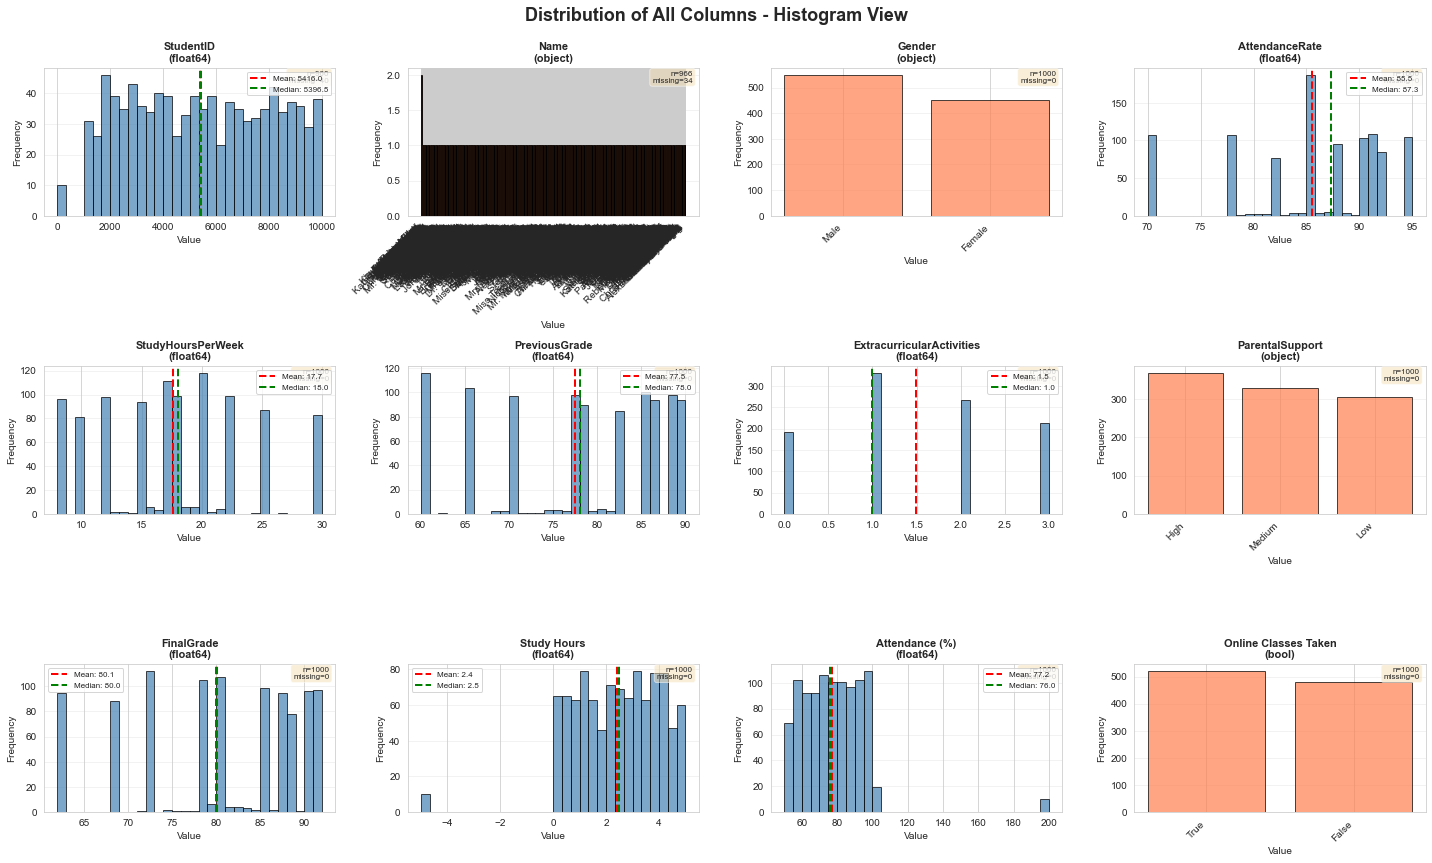

In [22]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

print("="*70)
print(" PLOTTING HISTOGRAMS FOR ALL COLUMNS")
print("="*70)

# Load data
print(f"\n✓ Loaded: {df1.shape[0]} rows × {df1.shape[1]} columns\n")

# Calculate grid size
n_cols = len(df1.columns)
n_rows = (n_cols + 3) // 4  # 4 columns per row

# Create figure
fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 4))
axes = axes.flatten()

print("Plotting columns:")

for idx, col in enumerate(df1.columns):
    ax = axes[idx]
    
    # Get data (remove missing values for plotting)
    data = df1[col].dropna()
    
    # Check if numerical or categorical
    if df1[col].dtype in ['float64', 'int64']:
        # NUMERICAL - Regular histogram
        ax.hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        
        # Add mean and median lines
        mean_val = data.mean()
        median_val = data.median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2,
                   label=f'Median: {median_val:.1f}')
        ax.legend(fontsize=8)
        
        print(f"  ✓ {col} (numerical)")
        
    else:
        # CATEGORICAL - Bar chart (frequency count)
        value_counts = data.value_counts()
        ax.bar(range(len(value_counts)), value_counts.values, 
               edgecolor='black', alpha=0.7, color='coral')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        print(f"  ✓ {col} (categorical)")
    
    # Common formatting
    ax.set_title(f'{col}\n({df1[col].dtype})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.3)
    
    # Add sample size
    n_missing = df1[col].isnull().sum()
    n_total = len(df)
    ax.text(0.98, 0.98, f'n={len(data)}\nmissing={n_missing}', 
            transform=ax.transAxes, fontsize=8,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide extra subplots
for idx in range(len(df1.columns), len(axes)):
    axes[idx].axis('off')

# Add title
plt.suptitle('Distribution of All Columns - Histogram View', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()


plt.show()
plt.close()



In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your data
df2 = df.copy()

# Split the data (assuming FinalGrade is your target variable)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('FinalGrade', axis=1),
    df['FinalGrade'],
    test_size=0.3,
    random_state=0
)

# Function to impute missing values with multiple strategies
def impute_na(df, variable, reference_data):
    """
    df: DataFrame to impute (X_train or X_test)
    variable: Column name with missing values
    reference_data: X_train (to calculate median and get random samples)
    """
    
    # Calculate median from training data only
    median = reference_data[variable].median()
    
    # Strategy 1: Fill with median
    df[variable+'_median'] = df[variable].fillna(median)
    
    # Strategy 2: Fill with zero
    df[variable+'_zero'] = df[variable].fillna(0)
    
    # Strategy 3: Fill with random sampling
    df[variable+'_random'] = df[variable].copy()
    
    # Extract random sample from training data to fill NAs
    random_sample = reference_data[variable].dropna().sample(
        df[variable].isnull().sum(), 
        random_state=0
    )
    
    # Align indices for proper assignment
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df

# Example: Impute StudyHoursPerWeek
print("Original X_train shape:", X_train.shape)
print(f"Missing values in StudyHoursPerWeek: {X_train['StudyHoursPerWeek'].isnull().sum()}")

# Apply imputation on training set
X_train = impute_na(X_train, 'StudyHoursPerWeek', X_train)

# Apply imputation on test set (using X_train as reference!)
X_test = impute_na(X_test, 'StudyHoursPerWeek', X_train)

print("\nAfter imputation - New columns created:")
print(X_train[['StudyHoursPerWeek', 'StudyHoursPerWeek_median', 
               'StudyHoursPerWeek_zero', 'StudyHoursPerWeek_random']].head(10))

Original X_train shape: (700, 11)
Missing values in StudyHoursPerWeek: 34

After imputation - New columns created:
     StudyHoursPerWeek  StudyHoursPerWeek_median  StudyHoursPerWeek_zero  \
105               20.0                      20.0                    20.0   
68                10.0                      10.0                    10.0   
479               17.0                      17.0                    17.0   
399                NaN                      17.0                     0.0   
434               12.0                      12.0                    12.0   
258                8.0                       8.0                     8.0   
827               20.0                      20.0                    20.0   
884               20.0                      20.0                    20.0   
304               12.0                      12.0                    12.0   
811               12.0                      12.0                    12.0   

     StudyHoursPerWeek_random  
105             

Here we created three columns which is imputed using three techniques:

one is median, one is with zeroes, and the other randomly with the other existing values. So, after training the model we can stick with the one which give best values for the evaluation.

### Replacement by Arbitrary Value

This imputation method means you pick a single value — like -1, 999, or 1000 — and use it to replace all missing values in a column. So, every missing value gets the same fixed number (not based on statistics like mean or median).

In [24]:

# Load dataset
df3 = df.copy()

print("="*70)
print("STEP 1: ANALYZE DISTRIBUTIONS TO CHOOSE ARBITRARY VALUES")
print("="*70)

# Numeric columns with missing values
numeric_cols = ['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade', 
                'ExtracurricularActivities', 'Study Hours', 'Attendance (%)']

# Analyze each column to determine appropriate arbitrary values
for col in numeric_cols:
    if col in df3.columns:
        print(f"\n{col}:")
        print(f"  Range: {df3[col].min():.2f} to {df3[col].max():.2f}")
        print(f"  Mean: {df3[col].mean():.2f}")
        print(f"  Missing: {df3[col].isnull().sum()} ({df3[col].isnull().sum()/len(df3)*100:.1f}%)")
        
        # Suggest values OUTSIDE the range
        if df3[col].min() >= 0:
            print(f"  ✓ Suggested: -1 or -999 (below minimum)")
            print(f"  ✓ Or: {int(df3[col].max() + 50)} (above maximum)")

# Categorical columns
print("\n" + "="*70)
print("CATEGORICAL COLUMNS")
print("="*70)

categorical_cols = ['Gender', 'ParentalSupport', 'Online Classes Taken']
for col in categorical_cols:
    if col in df3.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df3[col].unique()}")
        print(f"  Missing: {df3[col].isnull().sum()}")
        print(f"  ✓ Replace with: 'Missing'")

# ============================================================
# STEP 2: DEFINE IMPUTATION FUNCTION
# ============================================================

def impute_na_arbitrary(df, variable, value1, value2):
    """
    Impute missing values with arbitrary values
    
    Parameters:
    -----------
    df : DataFrame
        The dataframe to impute
    variable : str
        Column name with missing values
    value1, value2 : numeric or str
        Arbitrary values to use for imputation
    """
    df[variable + '_arb1'] = df[variable].fillna(value1)
    df[variable + '_arb2'] = df[variable].fillna(value2)
    
    return df

def impute_categorical_arbitrary(df, variable, missing_label='Missing'):
    """
    Impute missing values in categorical variables with 'Missing' label
    """
    df[variable + '_missing'] = df[variable].fillna(missing_label)
    
    return df

# ============================================================
# STEP 3: SPLIT DATA (BEFORE IMPUTATION)
# ============================================================

print("\n" + "="*70)
print("STEP 2: SPLIT DATA")
print("="*70)

# Check for missing values in target variable
print(f"Missing values in FinalGrade: {df3['FinalGrade'].isnull().sum()}")

# Remove rows where target variable is missing
df3_clean = df3.dropna(subset=['FinalGrade'])
print(f"Rows removed due to missing target: {len(df3) - len(df3_clean)}")

X = df3_clean.drop('FinalGrade', axis=1)
y = df3_clean['FinalGrade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Verify no NaN in target
print(f"NaN in y_train: {y_train.isnull().sum()}")
print(f"NaN in y_test: {y_test.isnull().sum()}")

# ============================================================
# STEP 4: APPLY ARBITRARY IMPUTATION
# ============================================================

print("\n" + "="*70)
print("STEP 3: APPLY ARBITRARY VALUE IMPUTATION")
print("="*70)

# Define arbitrary values for each column
# Key principle: Choose values OUTSIDE the normal range!

imputation_config = {
    'StudyHoursPerWeek': (-1, 999),        # Range: 0-40ish, use -1 and 999
    'AttendanceRate': (-1, 150),            # Range: 0-100, use -1 and 150
    'PreviousGrade': (-1, 999),             # Range: 0-100, use -1 and 999
    'ExtracurricularActivities': (-1, 99),  # Range: 0-5ish, use -1 and 99
    'Study Hours': (-1, 999),               # Similar to study hours per week
    'Attendance (%)': (-1, 150)             # Same as attendance rate
}

# Apply imputation to numeric columns
for col, (val1, val2) in imputation_config.items():
    if col in X_train.columns:
        print(f"\n{col}:")
        print(f"  Replacing {X_train[col].isnull().sum()} missing values")
        print(f"  Using arbitrary values: {val1} and {val2}")
        
        X_train = impute_na_arbitrary(X_train, col, val1, val2)
        X_test = impute_na_arbitrary(X_test, col, val1, val2)

# Apply imputation to categorical columns
for col in categorical_cols:
    if col in X_train.columns and X_train[col].isnull().sum() > 0:
        print(f"\n{col}: Replacing with 'Missing' label")
        X_train = impute_categorical_arbitrary(X_train, col, 'Missing')
        X_test = impute_categorical_arbitrary(X_test, col, 'Missing')

print(f"\n✓ Imputation complete!")
print(f"X_train now has {X_train.shape[1]} columns")

# ============================================================
# STEP 5: VERIFY IMPUTATION
# ============================================================

print("\n" + "="*70)
print("STEP 4: VERIFY IMPUTATION")
print("="*70)

# Show example: StudyHoursPerWeek
if 'StudyHoursPerWeek' in X_train.columns:
    print("\nExample - StudyHoursPerWeek imputation:")
    example_cols = ['StudyHoursPerWeek', 'StudyHoursPerWeek_arb1', 'StudyHoursPerWeek_arb2']
    available_cols = [c for c in example_cols if c in X_train.columns]
    
    print(X_train[available_cols].head(15))
    
    # Count how many values were imputed
    if 'StudyHoursPerWeek_arb1' in X_train.columns:
        original_missing = X_train['StudyHoursPerWeek'].isnull().sum()
        imputed_with_arb1 = (X_train['StudyHoursPerWeek_arb1'] == -1).sum()
        
        print(f"\nValues imputed with -1: {imputed_with_arb1}")

# ============================================================
# STEP 6: COMPARE WITH OTHER METHODS
# ============================================================

print("\n" + "="*70)
print("STEP 5: COMPARISON WITH OTHER IMPUTATION METHODS")
print("="*70)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate(X_train_subset, X_test_subset, y_train, y_test, method_name):
    """Train model and return metrics"""
    
    # Select only numeric columns
    X_train_numeric = X_train_subset.select_dtypes(include=[np.number])
    X_test_numeric = X_test_subset.select_dtypes(include=[np.number])
    
    # Handle any remaining NaN in features
    X_train_numeric = X_train_numeric.fillna(0)
    X_test_numeric = X_test_numeric.fillna(0)
    
    # Double-check for NaN in target variable
    if y_train.isnull().any():
        print(f"  Warning: Removing {y_train.isnull().sum()} NaN values from y_train")
        mask = ~y_train.isnull()
        X_train_numeric = X_train_numeric[mask]
        y_train_clean = y_train[mask]
    else:
        y_train_clean = y_train
    
    if y_test.isnull().any():
        print(f"  Warning: Removing {y_test.isnull().sum()} NaN values from y_test")
        mask = ~y_test.isnull()
        X_test_numeric = X_test_numeric[mask]
        y_test_clean = y_test[mask]
    else:
        y_test_clean = y_test
    
    # Verify no NaN values
    assert not X_train_numeric.isnull().any().any(), "X_train still has NaN!"
    assert not X_test_numeric.isnull().any().any(), "X_test still has NaN!"
    assert not y_train_clean.isnull().any(), "y_train still has NaN!"
    assert not y_test_clean.isnull().any(), "y_test still has NaN!"
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
    model.fit(X_train_numeric, y_train_clean)
    
    # Evaluate
    y_pred = model.predict(X_test_numeric)
    rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred))
    r2 = r2_score(y_test_clean, y_pred)
    
    return {'Method': method_name, 'Test_RMSE': rmse, 'Test_R2': r2}

# Compare different imputation approaches
results = []

# Method 1: Arbitrary value 1 (e.g., -1)
arb1_cols = [col + '_arb1' for col in imputation_config.keys() if col + '_arb1' in X_train.columns]
if arb1_cols:
    result = train_and_evaluate(X_train[arb1_cols], X_test[arb1_cols], y_train, y_test, 'Arbitrary (-1)')
    results.append(result)
    print(f"✓ {result['Method']}: RMSE={result['Test_RMSE']:.4f}, R²={result['Test_R2']:.4f}")

# Method 2: Arbitrary value 2 (e.g., 999)
arb2_cols = [col + '_arb2' for col in imputation_config.keys() if col + '_arb2' in X_train.columns]
if arb2_cols:
    result = train_and_evaluate(X_train[arb2_cols], X_test[arb2_cols], y_train, y_test, 'Arbitrary (999)')
    results.append(result)
    print(f"✓ {result['Method']}: RMSE={result['Test_RMSE']:.4f}, R²={result['Test_R2']:.4f}")

# Show results
if results:
    results_df = pd.DataFrame(results)
    print("\n" + "="*70)
    print("FINAL COMPARISON")
    print("="*70)
    print(results_df.to_string(index=False))
    
    best = results_df.loc[results_df['Test_R2'].idxmax()]
    print(f"\n🏆 Best performing: {best['Method']}")

# ============================================================
# KEY INSIGHTS
# ============================================================

print("\n" + "="*70)
print("KEY INSIGHTS: WHEN TO USE ARBITRARY VALUE IMPUTATION")
print("="*70)
print("""
✓ Use arbitrary values when:
  1. Data is NOT Missing At Random (MNAR)
  2. You want to FLAG missingness as potentially meaningful
  3. Tree-based models (Random Forest, XGBoost) - they handle it well
  
✗ Avoid arbitrary values when:
  1. Using Linear Regression (distorts distribution)
  2. Data is Missing Completely At Random (MCAR)
  3. Small proportion of missing values (<5%)
  
📌 Best Practices:
  • Choose values OUTSIDE the normal range (-1, -999, 999)
  • For categorical: use 'Missing' label
  • Test multiple arbitrary values and compare
  • Document your choice for reproducibility
""")

STEP 1: ANALYZE DISTRIBUTIONS TO CHOOSE ARBITRARY VALUES

StudyHoursPerWeek:
  Range: 8.00 to 30.00
  Mean: 17.63
  Missing: 50 (5.0%)
  ✓ Suggested: -1 or -999 (below minimum)
  ✓ Or: 80 (above maximum)

AttendanceRate:
  Range: 70.00 to 95.00
  Mean: 85.51
  Missing: 40 (4.0%)
  ✓ Suggested: -1 or -999 (below minimum)
  ✓ Or: 145 (above maximum)

PreviousGrade:
  Range: 60.00 to 90.00
  Mean: 77.60
  Missing: 33 (3.3%)
  ✓ Suggested: -1 or -999 (below minimum)
  ✓ Or: 140 (above maximum)

ExtracurricularActivities:
  Range: 0.00 to 3.00
  Mean: 1.52
  Missing: 43 (4.3%)
  ✓ Suggested: -1 or -999 (below minimum)
  ✓ Or: 53 (above maximum)

Study Hours:
  Range: -5.00 to 5.00
  Mean: 2.41
  Missing: 24 (2.4%)

Attendance (%):
  Range: 50.00 to 200.00
  Mean: 77.25
  Missing: 41 (4.1%)
  ✓ Suggested: -1 or -999 (below minimum)
  ✓ Or: 250 (above maximum)

CATEGORICAL COLUMNS

Gender:
  Unique values: ['Male' 'Female' nan]
  Missing: 48
  ✓ Replace with: 'Missing'

ParentalSupport:
  Uni

You use arbitrary value imputation when:
- Data is not missing at random (NMAR):
 - That means there is a reason some values are missing (e.g., people who didn’t disclose income might have very high or very low income).
 - In such cases, replacing with mean/median would hide the meaning of the missingness.
- You have a large proportion of missing data:
 - Traditional imputations (mean, median) can distort distributions heavily when too many values are missing.
- You want to flag the missingness explicitly:
 - Using an impossible or extreme number (like -999) allows the model to “notice” that the value was missing originally.
 - The model can learn that “missingness” itself carries information.

### End of Distribution Imputation


- End of Distribution Imputation is a missing data handling technique where missing values are replaced by an extreme value at the tail (end) of the variable’s distribution — usually far beyond the typical range of that variable.

- This means:
  - Instead of replacing missing values with the mean or median (which makes them look "normal"), we replace them with a value at the edge or extreme end of the distribution — where very few observations exist.

- The main goal is to:
  - Preserve the information that a value was missing.
  - Make the observation stand out as unusual — since missing values may indicate something special about those records.
  - This is particularly useful when you suspect that:
       - Missingness is not random — i.e., there’s a reason why some data are missing (e.g., a patient skipped an expensive test, a person didn’t report age intentionally, etc.).
       - By assigning an extreme value, we don’t lose that signal — the model can learn that such observations are different.

- If a value is missing, it might mean:
  - The person didn’t report it intentionally.
  - The measurement failed due to a specific condition.
  - Or, it correlates with some hidden property (e.g., lower survival chance, lower income, etc.).
  - By assigning an extreme value, you’re encoding missingness as an outlier, allowing tree-based models (like Random Forests or XGBoost) to split on that condition effectively.

- Limitations

  - ⚠️ Distorts distribution:
  - The variable’s shape becomes unnatural (spikes at extreme values), which can hurt linear models (e.g., Logistic Regression, Linear Regression).
  - ⚠️ Scale Sensitivity:
      - The extreme value depends on mean and standard deviation, which can vary widely across datasets.
  - ⚠️ Interpretation difficulty:
      - When analyzing model outputs, those extreme values do not represent real-world data — they’re placeholders for “missing”.

- When to Use

  - ✅ Use for:
      - Tree-based models (Random Forest, XGBoost, LightGBM)
      - Situations where missingness conveys meaningful information
      - When you want the model to learn that “missing” = “different”
  - ❌ Avoid for:
      - Linear models or models assuming normality
      - Cases with a high proportion of missing data (can skew results heavily)

(700, 12) (300, 12)
Missing values in X_train:
StudentID                            26
Name                                 27
Gender                               36
AttendanceRate                        0
StudyHoursPerWeek                     0
PreviousGrade                         0
ExtracurricularActivities             0
ParentalSupport                      16
FinalGrade                            0
Study Hours                          15
Attendance (%)                       27
Online Classes Taken                 21
AttendanceRate_far_end                0
StudyHoursPerWeek_far_end             0
PreviousGrade_far_end                 0
ExtracurricularActivities_far_end     0
FinalGrade_far_end                    0
dtype: int64

Missing values in X_test:
StudentID                            14
Name                                  7
Gender                               12
AttendanceRate                        0
StudyHoursPerWeek                     0
PreviousGrade                    

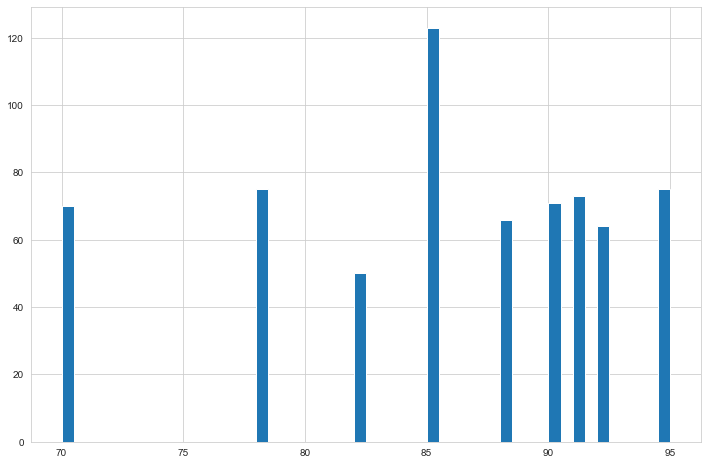

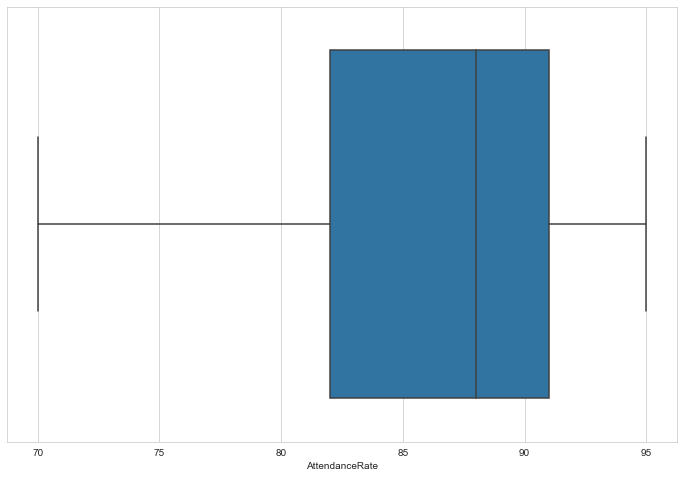

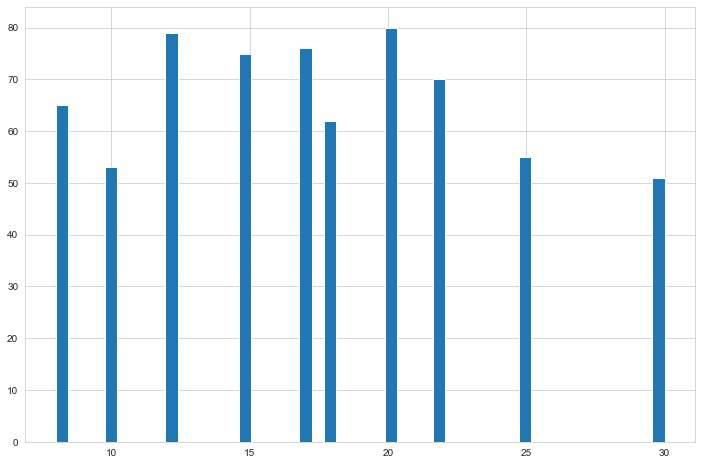

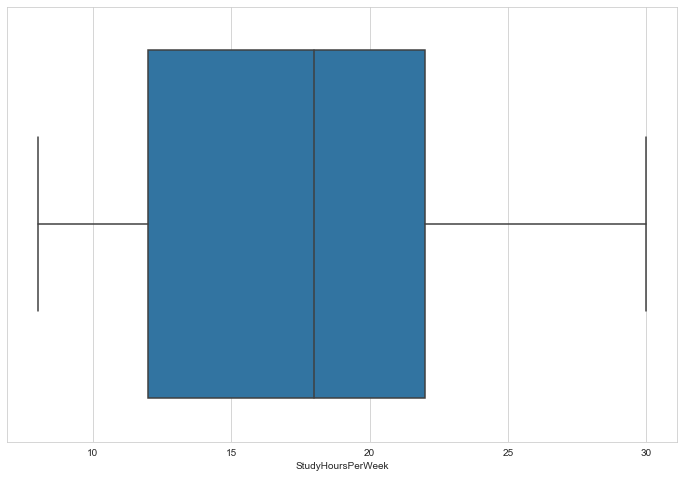

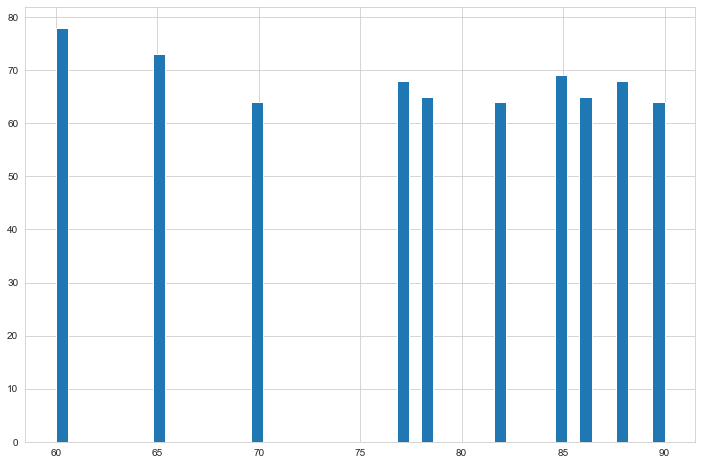

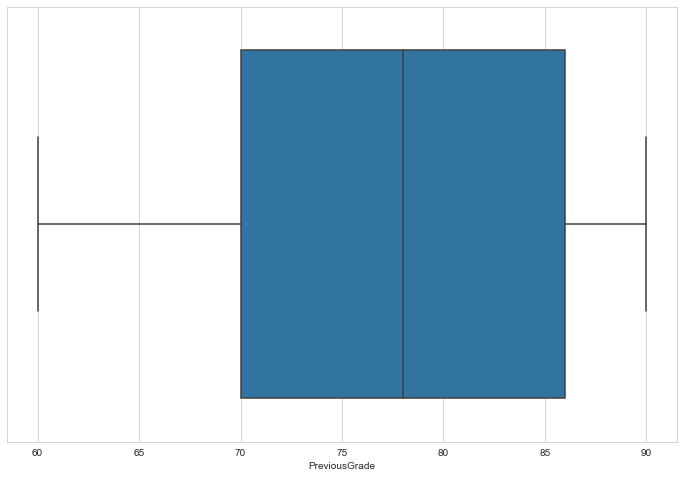

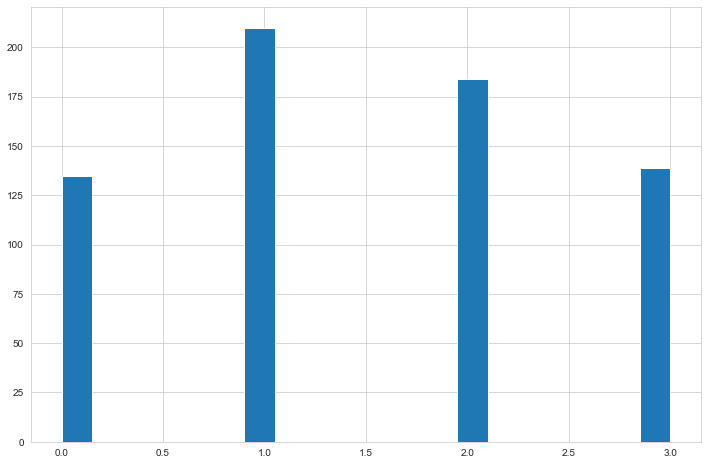

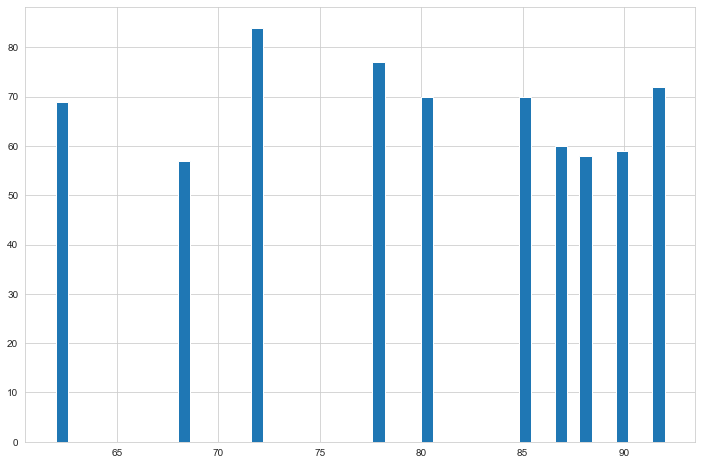

In [25]:
"""
COMPLETE END OF DISTRIBUTION IMPUTATION CODE
Student Performance Dataset - Using df4 as dataframe name
Following Titanic Example Structure
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# =============================================================================
# LOADING DATASET AS data5
# =============================================================================


data5 = df.copy()

# =============================================================================
# TRAIN-TEST SPLIT
# =============================================================================

# Let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data5, 
    data5.FinalGrade, 
    test_size=0.3,
    random_state=0
)

print(X_train.shape, X_test.shape)

# =============================================================================
# VISUALIZE DISTRIBUTION - AttendanceRate
# =============================================================================

plt.figure(figsize=(12,8))
X_train.AttendanceRate.hist(bins=50)

# =============================================================================
# CALCULATE FAR END OF DISTRIBUTION
# =============================================================================

# At far end of the distribution
X_train.AttendanceRate.mean() + 3*X_train.AttendanceRate.std()

# =============================================================================
# CHECK FOR OUTLIERS - BOXPLOT
# =============================================================================

# We can see that there are outliers for AttendanceRate
# According to its distribution, these outliers will be masked when we replace NA by values at the far end
plt.figure(figsize=(12,8))
sns.boxplot(x='AttendanceRate', data=data5)

# =============================================================================
# DEFINE IMPUTATION FUNCTION (SAME AS TITANIC)
# =============================================================================

def impute_na(df, variable, median, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    df[variable] = df[variable].fillna(median)

# =============================================================================
# APPLY IMPUTATION - AttendanceRate
# =============================================================================

# Let's replace the NA with the median value in the training and testing sets
impute_na(X_train, 'AttendanceRate', X_train.AttendanceRate.median(), X_train.AttendanceRate.mean()+3*X_train.AttendanceRate.std())
impute_na(X_test, 'AttendanceRate', X_train.AttendanceRate.median(), X_train.AttendanceRate.mean()+3*X_train.AttendanceRate.std())

# =============================================================================
# APPLY IMPUTATION - StudyHoursPerWeek
# =============================================================================

plt.figure(figsize=(12,8))
X_train.StudyHoursPerWeek.hist(bins=50)

X_train.StudyHoursPerWeek.mean() + 3*X_train.StudyHoursPerWeek.std()

plt.figure(figsize=(12,8))
sns.boxplot(x='StudyHoursPerWeek', data=data5)

impute_na(X_train, 'StudyHoursPerWeek', X_train.StudyHoursPerWeek.median(), X_train.StudyHoursPerWeek.mean()+3*X_train.StudyHoursPerWeek.std())
impute_na(X_test, 'StudyHoursPerWeek', X_train.StudyHoursPerWeek.median(), X_train.StudyHoursPerWeek.mean()+3*X_train.StudyHoursPerWeek.std())

# =============================================================================
# APPLY IMPUTATION - PreviousGrade
# =============================================================================

plt.figure(figsize=(12,8))
X_train.PreviousGrade.hist(bins=50)

X_train.PreviousGrade.mean() + 3*X_train.PreviousGrade.std()

plt.figure(figsize=(12,8))
sns.boxplot(x='PreviousGrade', data=data5)

impute_na(X_train, 'PreviousGrade', X_train.PreviousGrade.median(), X_train.PreviousGrade.mean()+3*X_train.PreviousGrade.std())
impute_na(X_test, 'PreviousGrade', X_train.PreviousGrade.median(), X_train.PreviousGrade.mean()+3*X_train.PreviousGrade.std())

# =============================================================================
# APPLY IMPUTATION - ExtracurricularActivities
# =============================================================================

plt.figure(figsize=(12,8))
X_train.ExtracurricularActivities.hist(bins=20)

X_train.ExtracurricularActivities.mean() + 3*X_train.ExtracurricularActivities.std()

impute_na(X_train, 'ExtracurricularActivities', X_train.ExtracurricularActivities.median(), X_train.ExtracurricularActivities.mean()+3*X_train.ExtracurricularActivities.std())
impute_na(X_test, 'ExtracurricularActivities', X_train.ExtracurricularActivities.median(), X_train.ExtracurricularActivities.mean()+3*X_train.ExtracurricularActivities.std())

# =============================================================================
# APPLY IMPUTATION - FinalGrade
# =============================================================================

plt.figure(figsize=(12,8))
X_train.FinalGrade.hist(bins=50)

X_train.FinalGrade.mean() + 3*X_train.FinalGrade.std()

impute_na(X_train, 'FinalGrade', X_train.FinalGrade.median(), X_train.FinalGrade.mean()+3*X_train.FinalGrade.std())
impute_na(X_test, 'FinalGrade', X_train.FinalGrade.median(), X_train.FinalGrade.mean()+3*X_train.FinalGrade.std())

# =============================================================================
# VERIFY RESULTS
# =============================================================================

# Check missing values
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("\nMissing values in X_test:")
print(X_test.isnull().sum())

# View new columns created
print("\nNew columns with '_far_end' suffix:")
print([col for col in X_train.columns if '_far_end' in col])

# =============================================================================
# DONE! 
# =============================================================================
print("\n✓ Imputation Complete!")
print("Original columns: Median imputed values")
print("New '_far_end' columns: Far end imputed values (mean + 3*std)")